# 1.  Scrapper les données de la page facebook Tunisie Télécom

In [1]:
import requests 
import time
import pickle
import random

token="EAACEdEose0cBAKLUJXatW74LPMZCFjlLUzHsu6lCZApqVOeUldf19xdwSoLMSmqu3MfauNlb9nAV9oZAgZCIoCZBMLTNdKTcpqnZBRM3tSyNLGwS0dA0jRKPnsFFncDx5lotDWU3WWjjYIuZBQRXPXjuSkN8x7Wf854b0cbrwwxdmBpmoGO1EHK46lnTArZChsgZD"
       
def req_facebook(req):
    r = requests.get("https://graph.facebook.com/v2.8/" + req , {'access_token' : token})
    return r

req_facebook("TunisieTelecom?fields=posts{comments.limit(0).summary(true),likes.limit(0).summary(true),created_time,message,id}")
r=req_facebook("TunisieTelecom?fields=posts{comments.limit(0).summary(true),likes.limit(0).summary(true),created_time,message,id}")
results= r.json()

data=[]
results =results['posts']

i=0
while True:

    try:
        time.sleep(random.randint(3,6))
        data.extend(results['data'])
        r=requests.get(results['paging']['next'])
        results= r.json()    
        i += 1
   
        if i > 200:
            break
    except:
        print ("done")
        break 
    

done


# 2.  Visualiser la base de données

In [2]:
 import pandas as pd
import string
from operator import itemgetter 

#Voir les détails sur le 1er post
data[0]

{'comments': {'data': [],
  'summary': {'can_comment': True, 'order': 'ranked', 'total_count': 2}},
 'created_time': '2018-06-30T13:00:02+0000',
 'id': '117627008288878_1977214322330128',
 'likes': {'data': [],
  'summary': {'can_like': True, 'has_liked': False, 'total_count': 31}},
 'message': 'كيف كل أول نهار أحد من الشهر جديد، تنجموا تزوروا المتاحف إلي في تونس الكل بلاش 😍'}

In [3]:
#voir les détails sur le 2ème .. 6ème post
data[1:5]

[{'comments': {'data': [],
   'summary': {'can_comment': True, 'order': 'ranked', 'total_count': 3}},
  'created_time': '2018-06-29T18:00:01+0000',
  'id': '117627008288878_1977181962333364',
  'likes': {'data': [],
   'summary': {'can_like': True, 'has_liked': False, 'total_count': 47}},
  'message': 'مغروم بالكتب 📚 و les magazines📰، من اليوم تبع كل ماهو جديد😃 على YouScribe و خليك à jour😉\nباش تعرف أكثر معلومات إنزل هنا : https://goo.gl/V64oBv'},
 {'comments': {'data': [],
   'summary': {'can_comment': True, 'order': 'ranked', 'total_count': 40}},
  'created_time': '2018-06-28T13:10:00+0000',
  'id': '117627008288878_1975296145855279',
  'likes': {'data': [],
   'summary': {'can_like': True, 'has_liked': False, 'total_count': 1212}},
  'message': 'توانسة شاركوا معانا و إتصالات تونس خلاتهم يعيشو الحلم و يساندوا تونس 🇹🇳👌\nهاي رسالتهم قبل الماتش 🇹🇳👌⚽'},
 {'comments': {'data': [],
   'summary': {'can_comment': True, 'order': 'ranked', 'total_count': 8}},
  'created_time': '2018-06-27T20:3

In [4]:
#visualiser les détails sur le dernier post scrapé
data[-1] 

{'comments': {'data': [],
  'summary': {'can_comment': True, 'order': 'ranked', 'total_count': 41}},
 'created_time': '2016-08-18T08:46:35+0000',
 'id': '117627008288878_1240814119303489',
 'likes': {'data': [],
  'summary': {'can_like': True, 'has_liked': False, 'total_count': 900}}}

In [5]:
#longueur de la base 
len(data)

1375

In [6]:
#type de la base
type(data)

list

# 3.  Pre-processing de la base de données 

## Normaliser la base

In [7]:
df2 = pd.io.json.json_normalize(data=data)
df2.head()
df2.columns

Index(['comments.data', 'comments.summary.can_comment',
       'comments.summary.order', 'comments.summary.total_count',
       'created_time', 'id', 'likes.data', 'likes.summary.can_like',
       'likes.summary.has_liked', 'likes.summary.total_count', 'message'],
      dtype='object')

## Effacer quelques colonnes 

In [8]:
df2.columns[0]
df2.drop('comments.data' , 1 , inplace=True)
df2.drop( df2.columns[[0,1,5,6,7]] , 1 , inplace=True)

## Renommer les colonnes 

In [9]:
df2.rename( columns= { "comments.summary.total_count" : "total_comments"} , inplace=True)
df2.rename( columns= { "likes.summary.total_count" : "total_likes"} , inplace=True)

## Effacer les valeurs nulles 

In [10]:
df2.fillna("",inplace=True)

## Visualiser la base nettoyée 

In [11]:
df2.head(10)

,total_comments,created_time,id,total_likes,message
0,2,2018-06-30T13:00:02+0000,117627008288878_1977214322330128,31,كيف كل أول نهار أحد من الشهر جديد، تنجموا تزور...
1,3,2018-06-29T18:00:01+0000,117627008288878_1977181962333364,47,مغروم بالكتب 📚 و les magazines📰، من اليوم تبع ...
2,40,2018-06-28T13:10:00+0000,117627008288878_1975296145855279,1212,توانسة شاركوا معانا و إتصالات تونس خلاتهم يعيش...
3,8,2018-06-27T20:33:24+0000,117627008288878_1974328142618746,67,تبع عالم يوسف المساكني ⚽🏆\nو أبعثت مجانا Y7 عل...
4,28,2018-06-27T12:29:25+0000,117627008288878_1973689936015900,150,شارك مع 🎊 TT Quiz 🎊 كيما Karamti Chawki باش تد...
5,279,2018-06-26T18:00:01+0000,117627008288878_1972342666150627,5554,التوانسة أبدعو في روسيا و العالم الكل يشهد بين...
6,73,2018-06-26T17:00:02+0000,117627008288878_1972299202821640,395,مع Netbox Internet \nبرنشي كونكتيي و الـ 25Go ...
7,25,2018-06-26T12:14:12+0000,117627008288878_1971965562855004,128,شارك مع 🎊 TT Quiz 🎊 كيما Heribi Hamdi و إلا Ja...
8,389,2018-06-24T20:00:00+0000,117627008288878_1969407523110808,9135,عصام الشوالي : عمري ماريت توانسة كيف هكا 🇹🇳
9,105,2018-06-24T12:00:01+0000,117627008288878_1967651363286424,5893,مع les nouveaux forfaits OH!Méga\nالconnexion...


# 4.  Analyser la base de données

## Donner les 10 publications les plus commentées

In [12]:
#Most commented posts
df2.sort_values('total_comments',inplace=True,ascending=False)
top_comments=df2.head(10)
top_comments

,total_comments,created_time,id,total_likes,message
483,22963,2018-01-01T17:46:47+0000,117627008288878_1761990677185828,3320,حفل العام الجديد بالكادوات 🎉🎁🎀\n\n العب و اربح...
669,14904,2017-08-09T10:52:28+0000,117627008288878_1615041551880742,11574,لعبتنا اليوم فيها تساكر لسهريّة مهرجان قرطاج ا...
216,10549,2018-05-10T11:30:01+0000,117627008288878_1912684712116423,3745,شنية الرقم الناقص في السلسلة ؟ 🤔\nطلع معانا وا...
829,9665,2017-04-19T09:20:44+0000,117627008288878_1496174600434105,1456,لعبتنا فيها تاليفون للولاد و تاليفون للبنات📱.....
775,6407,2017-05-25T19:42:20+0000,117627008288878_1531789463539285,5602,بمناسبة عيد الأمهات، اتصالات تونس تودكم بأعز ا...
233,6250,2018-05-02T16:21:00+0000,117627008288878_1904195626298665,56709,YA ROUSSIA JAYIN يا روسيا جايين 2\n#YRJ #Tunis...
606,5845,2017-09-29T18:58:46+0000,117627008288878_1665823723469191,2113,تحب تربح تليفون ؟؟📱🎉\nساهل ياسر ماعليك كان تكت...
555,3180,2017-11-11T18:55:46+0000,117627008288878_1707092332675663,23074,يااا روووسيااا جااييين و جااييين هاو جاااييين ...
13,2871,2018-06-22T17:03:36+0000,117627008288878_1965937463457814,9433,نقولو ماناش مروحين 💪 توا جات روح جديدة ، نغمة ...
947,1964,2017-02-15T19:02:00+0000,117627008288878_1425322067519359,421,لعبتنا اليوم لازمتها عينين قويين.. 😅👀\nدور يسا...


## Donner les urls des 10 publications les plus commentées

In [13]:
##ids of the 10 top commented posts
top_comments_id=top_comments['id']
top_comments_id

##urls of the 10 top commented posts
for i,x in top_comments_id.iteritems():
    print ('https://www.facebook.com/'+x )

https://www.facebook.com/117627008288878_1761990677185828
https://www.facebook.com/117627008288878_1615041551880742
https://www.facebook.com/117627008288878_1912684712116423
https://www.facebook.com/117627008288878_1496174600434105
https://www.facebook.com/117627008288878_1531789463539285
https://www.facebook.com/117627008288878_1904195626298665
https://www.facebook.com/117627008288878_1665823723469191
https://www.facebook.com/117627008288878_1707092332675663
https://www.facebook.com/117627008288878_1965937463457814
https://www.facebook.com/117627008288878_1425322067519359


## Donner les 10 publications qui ont obtenu plus de likes 

In [14]:
##Most Liked Posts 
df2.sort_values('total_likes',inplace=True,ascending=False)
top_likes = df2.head(10)['id']

## Donner les urls des 10 publications qui ont obtenu plus de likes 

In [15]:
#urls of the 10 top commented posts
for i,x in top_likes.iteritems():
    print ('https://www.facebook.com/'+x )

https://www.facebook.com/117627008288878_1904195626298665
https://www.facebook.com/117627008288878_1707092332675663
https://www.facebook.com/117627008288878_1390483674336532
https://www.facebook.com/117627008288878_1856541627730732
https://www.facebook.com/117627008288878_1879691842082377
https://www.facebook.com/117627008288878_1881338555251039
https://www.facebook.com/117627008288878_1374836439234589
https://www.facebook.com/117627008288878_1879693382082223
https://www.facebook.com/117627008288878_1953010871417140
https://www.facebook.com/117627008288878_1813043068747255


In [16]:
mapping = dict.fromkeys(map(ord, string.punctuation))

#Créer une fonction qui compte les mots dans les messages des publications    
def count_words(df):    
    
    words={}

    for m in df2['message']:
        try:
            seperated_words=m.split(' ')
        except:
            pass
           # print "ERROR"+str(m) 
        for word in seperated_words:
                word=word.strip()
                word=word.lower()
                
                word=word.translate(mapping) # Removes any punctation
                
                if word in words:
                    words[word]+=1
                else:
                    words[word]=1
    print("done counting words")
    return words

words=count_words(df2)

done counting words


In [17]:
words

{'ya': 2,
 'roussia': 2,
 'jayin': 1,
 'يا': 16,
 'روسيا': 9,
 'جايين': 14,
 '2\nyrj': 1,
 'tunisie': 61,
 'yaroussiajayin': 1,
 'يااا': 1,
 'روووسيااا': 1,
 'جااييين': 2,
 'و': 498,
 'هاو': 5,
 'جاااييين': 1,
 'اتصلات': 2,
 'تونس': 161,
 'ديما': 22,
 'مع': 174,
 'عشاق': 3,
 'المنتخب': 18,
 '': 8725,
 '🇹🇳🇹🇳🇹🇳': 2,
 '😃🤣😎🎤⚽️✈️🇹🇳🇹🇳': 1,
 'لكلنا': 7,
 'نستناو': 2,
 'في': 404,
 'الmatch': 1,
 'بالدقيقة': 1,
 'الدرج': 1,
 '⌚️⚽️\nلكلنا': 1,
 'نحبوا': 10,
 'نشوفوا': 1,
 'الكورة': 4,
 'الشبكة': 1,
 '⚽️😄😍\nحاضرين': 1,
 'لتشجيع': 4,
 '؟': 73,
 '🇹🇳🎉💪💯\nتابعونا': 1,
 'على': 258,
 'مواقعنا': 1,
 '📱💻httpbitly2hplrvy\nfacebook': 1,
 'twitter': 7,
 'instagram': 16,
 'et': 100,
 'snapchat\nبرشة': 1,
 'جوائز': 3,
 'للربح': 7,
 '🎁🎈🎊': 2,
 'بالكورة': 1,
 'مغروم': 25,
 'نيمار': 2,
 'تحب': 71,
 'تكون': 25,
 '😉\nشرجي': 1,
 'ligne': 24,
 'hayya': 17,
 'متاعك': 6,
 'اربح': 19,
 'برشة': 39,
 'كادوات': 28,
 'منهم': 1,
 '4voyages': 1,
 'au': 44,
 'brésil': 3,
 'باش': 96,
 'تحضر': 11,
 'final': 2,
 '🇧🇷': 3,
 '⚽': 3

## Donner la liste des mots et le nombre de leurs apparitions triés 

In [18]:
words_df=pd.DataFrame(list(words.items()), columns=['Word' , 'count'])
words_df
words_df.sort_values('count' , ascending=False,inplace=True)

In [19]:
words_df

,Word,count
21,,8725
12,و,498
26,في,404
77,من,373
39,على,258
437,de,240
73,أهم,231
74,أحداث,218
78,مسلسل,211
75,الحلقة,189


## Donner seulement les mots qui ont apparu plus que 100 fois 

In [20]:
words_df[words_df['count'] > 100]


,Word,count
21,,8725
12,و,498
26,في,404
77,من,373
39,على,258
437,de,240
73,أهم,231
74,أحداث,218
78,مسلسل,211
75,الحلقة,189


## Savoir combien de fois ces mots ont apparu dans les messages des publications ["roussia","jayin","page","chance"]

In [22]:
#count of words in messages (posts)    
num_words=["roussia","jayin","page","chance"]

print (words_df[ words_df['Word'].isin(num_words) ])

        Word  count
264     page     24
703   chance      7
1    roussia      2
2      jayin      1


## Grouper les publications par des mots-clés (TT par exemple)

In [23]:
df2['TT']=df2.message.str.contains('TT')
df2.head(50)

,total_comments,created_time,id,total_likes,message,TT
233,6250,2018-05-02T16:21:00+0000,117627008288878_1904195626298665,56709,YA ROUSSIA JAYIN يا روسيا جايين 2\n#YRJ #Tunis...,False
555,3180,2017-11-11T18:55:46+0000,117627008288878_1707092332675663,23074,يااا روووسيااا جااييين و جااييين هاو جاااييين ...,False
1035,272,2017-01-14T14:00:15+0000,117627008288878_1390483674336532,22934,لكلنا نستناو في الmatch بالدقيقة و الدرج ⌚️⚽️\...,False
349,99,2018-03-22T11:11:10+0000,117627008288878_1856541627730732,17462,بالكورة مغروم و مع نيمار تحب تكون 😉\nشرجي lign...,False
293,549,2018-04-10T20:10:00+0000,117627008288878_1879691842082377,16817,تبعوا حصريا أهم أحداث الحلقة القادمة من مسلسل ...,False
289,557,2018-04-12T20:10:00+0000,117627008288878_1881338555251039,14874,تبعوا حصريا أهم أحداث الحلقة القادمة من مسلسل ...,False
1094,232,2016-12-27T18:00:09+0000,117627008288878_1374836439234589,14845,معا TT كمّل تمتّع حتى آخر العام بال Offre Mri...,True
291,479,2018-04-11T20:10:00+0000,117627008288878_1879693382082223,13964,تبعوا حصريا أهم أحداث الحلقة القادمة من مسلسل ...,False
35,663,2018-06-15T17:00:02+0000,117627008288878_1953010871417140,13361,الشوالي عندو ما يقول قبل ماتش إنجلترا، برجولية...,False
422,368,2018-02-16T19:50:00+0000,117627008288878_1813043068747255,12199,تبعوا حصريا أهم أحداث الحلقة القادمة من مسلسل ...,False


In [24]:
df2.groupby(by=df2['TT']).count()

,total_comments,created_time,id,total_likes,message
TT,,,,,
False,1154,1154,1154,1154,1154
True,221,221,221,221,221


## Grouper les publications par les dates de leur publication

In [25]:
type(df2.created_time.loc[0])

str

In [26]:
date_df=pd.DataFrame(pd.to_datetime(df2.created_time))

In [27]:
date_df

,created_time
233,2018-05-02 16:21:00
555,2017-11-11 18:55:46
1035,2017-01-14 14:00:15
349,2018-03-22 11:11:10
293,2018-04-10 20:10:00
289,2018-04-12 20:10:00
1094,2016-12-27 18:00:09
291,2018-04-11 20:10:00
35,2018-06-15 17:00:02
422,2018-02-16 19:50:00


## Grouper les publications par mois

In [28]:
type(date_df.created_time.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

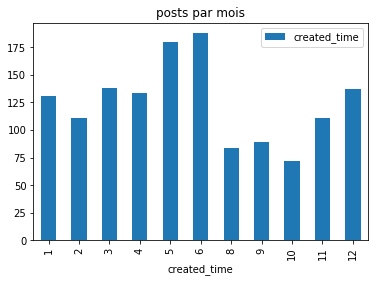

In [29]:
%matplotlib inline

fig= date_df.groupby(date_df.created_time.dt.month).count().plot(kind="bar",title="posts par mois")

## Grouper les dates des publications par année

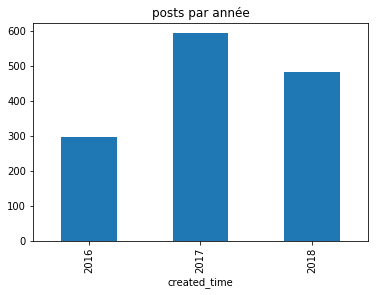

In [30]:
%matplotlib inline

fig= date_df.groupby(date_df.created_time.dt.year).count().plot(kind="bar",legend=False, title="posts par année")

## Grouper les publications par jour

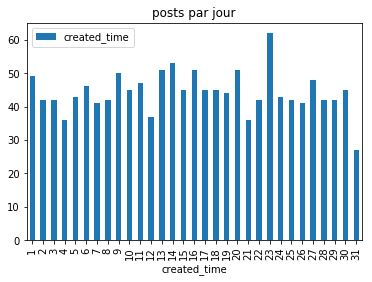

In [31]:
%matplotlib inline

fig= date_df.groupby(date_df.created_time.dt.day).count().plot(kind="bar",title="posts par jour")

## Donner les publications qui ont été publiées à partir de 1-1-2018

In [32]:
date_df[date_df.created_time>"1-1-2018"]

,created_time
233,2018-05-02 16:21:00
349,2018-03-22 11:11:10
293,2018-04-10 20:10:00
289,2018-04-12 20:10:00
291,2018-04-11 20:10:00
35,2018-06-15 17:00:02
422,2018-02-16 19:50:00
285,2018-04-13 20:10:00
374,2018-03-09 20:10:00
389,2018-03-04 20:10:00
